In [0]:
from datasets import load_dataset
from collections import Counter
import matplotlib.pyplot as plt
from src.vit.utils.utils import cls_lookup, cls_dict

In [0]:
dataset = load_dataset("matthieulel/galaxy10_decals")

/databricks/python_shell/lib/dbruntime/huggingface_patches/datasets.py:55: UserWarning: The cache_dir for this dataset is /tmp/.hf.data.cache, which is not a persistent path.Therefore, if/when the cluster restarts, the downloaded dataset will be lost.The persistent storage options for this workspace/cluster config are: [UC Volumes].Please update either `cache_dir` or the environment variable `HF_DATASETS_CACHE`to be under one of the following root directories: ['/Volumes/']
  warnings.warn(warning_message)


README.md: 0.00B [00:00, ?B/s]

/databricks/python_shell/lib/dbruntime/huggingface_patches/datasets.py:24: UserWarning: During large dataset downloads, there could be multiple progress bar widgets that can cause performance issues for your notebook or browser. To avoid these issues, use `datasets.utils.logging.disable_progress_bar()` to turn off the progress bars.
  warnings.warn(


data/train-00000-of-00005-3ac4e3b3fa8df6(…):   0%|          | 0.00/457M [00:00<?, ?B/s]

data/train-00001-of-00005-72e716d68bb134(…):   0%|          | 0.00/458M [00:00<?, ?B/s]

data/train-00002-of-00005-8dd97810f77d7a(…):   0%|          | 0.00/458M [00:00<?, ?B/s]

data/train-00003-of-00005-0e1eda89906f6e(…):   0%|          | 0.00/458M [00:00<?, ?B/s]

data/train-00004-of-00005-cbbd007c0641d3(…):   0%|          | 0.00/457M [00:00<?, ?B/s]

data/test-00000-of-00001-cef82967b9d8e57(…):   0%|          | 0.00/255M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15962 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1774 [00:00<?, ? examples/s]

In [0]:
train_dataset = dataset['train']
test_dataset = dataset['test']

In [0]:
train_counts = Counter(train_dataset["label"])
test_counts = Counter(test_dataset["label"])

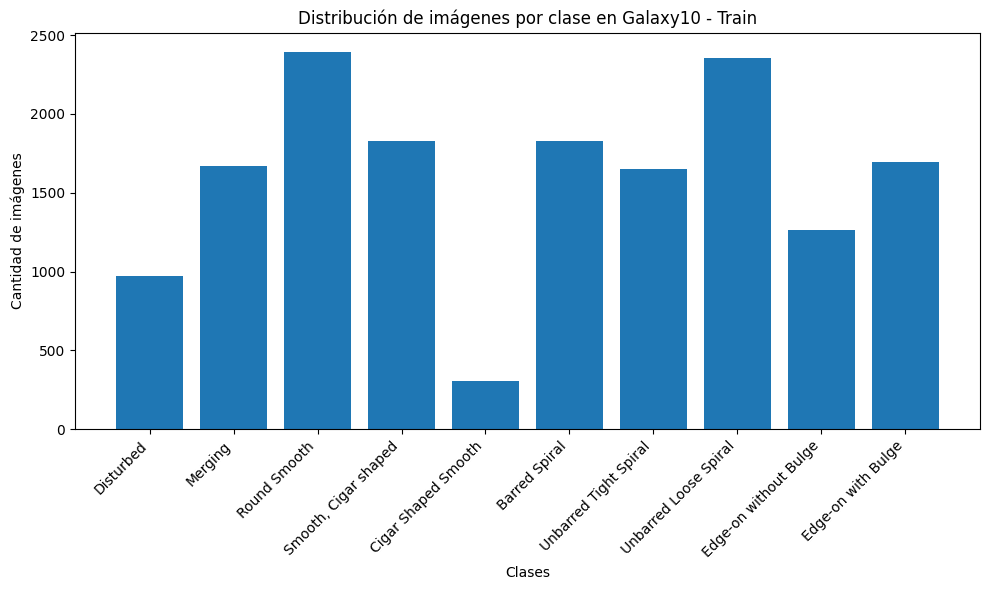

In [0]:
plt.figure(figsize=(10, 6))
plt.bar(train_counts.keys(), train_counts.values(), tick_label=[cls_lookup(cls) for cls in train_counts.keys()])
plt.xlabel("Clases")
plt.ylabel("Cantidad de imágenes")
plt.title("Distribución de imágenes por clase en Galaxy10 - Train")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

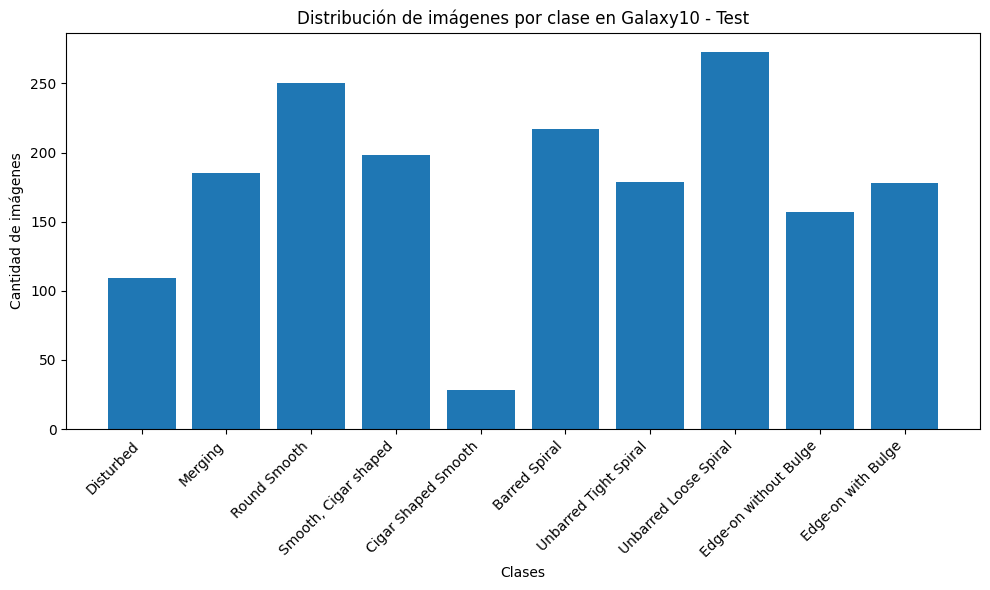

In [0]:
plt.figure(figsize=(10, 6))
plt.bar(test_counts.keys(), test_counts.values(), tick_label=[cls_lookup(cls) for cls in test_counts.keys()])
plt.xlabel("Clases")
plt.ylabel("Cantidad de imágenes")
plt.title("Distribución de imágenes por clase en Galaxy10 - Test")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

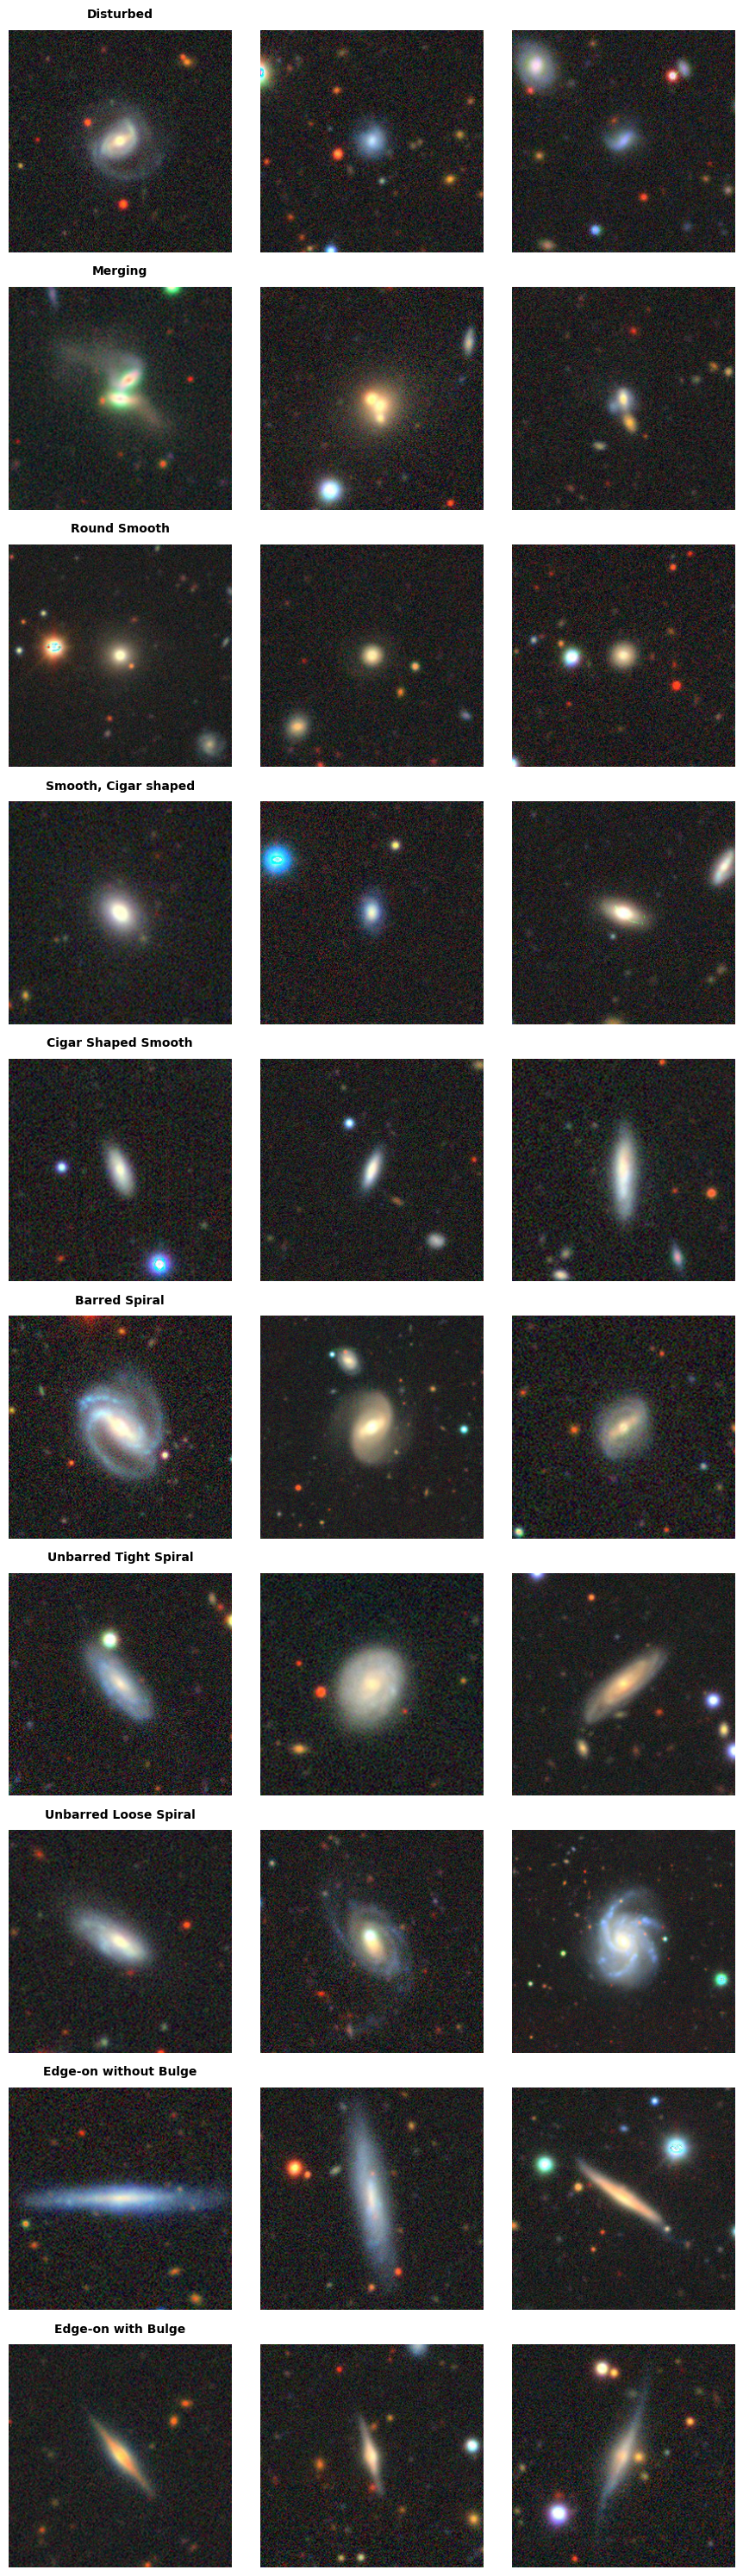

In [0]:
examples_per_class = 3

examples = {cls: [] for cls in cls_dict.keys()}

for item in train_dataset:
    label = item["label"]
    if len(examples[label]) < examples_per_class:
        examples[label].append(item["image"])

    # Cortar si ya tenemos todo
    if all(len(examples[c]) == examples_per_class for c in cls_dict.keys()):
        break

# Mostrar imágenes
fig, axs = plt.subplots(len(cls_dict), examples_per_class, figsize=(examples_per_class * 3, len(cls_dict)*3))

for cls_idx, cls_name in cls_dict.items():
    for i in range(examples_per_class):
        axs[cls_idx, i].imshow(examples[cls_idx][i])
        axs[cls_idx, i].axis("off")
        if i == 0:
            axs[cls_idx, i].set_title(cls_name, fontsize=10, fontweight='bold', pad=10)

plt.tight_layout()
plt.show()